# Parse XML and convert it to XLSX

In [17]:
import xml.etree.ElementTree as ET
import xlsxwriter

In [18]:
root = ET.parse('test2.xml').getroot() 

# test2.xml is the XML block of the link: https://www.sec.gov/Archives/edgar/data/1484018/000148401818000039/0001484018-18-000039.txt

### Parsing XML with Namespaces

In [19]:
# Namespaces 
ns = {'prefix1':'http://www.sec.gov/edgar/ncen','prefix2': 'http://www.sec.gov/edgar/common'}

In [20]:
formdata           = root.findall('prefix1:formData',ns)
exchangeSeriesInfo = formdata[0].find('prefix1:exchangeSeriesInfo', ns)
exchangeTradedFund = exchangeSeriesInfo.findall('prefix1:exchangeTradedFund', ns)

i = 0
dict1 ={}
fund_name=[]
for etf in exchangeSeriesInfo.findall('prefix1:exchangeTradedFund', ns):
    print(etf)
    item = (etf.find('prefix1:fundName', ns)).text
    fund_name.append(item)
    for aps in etf.findall('prefix1:authorizedParticipants', ns):
        print(aps)
        for ap in aps.findall('prefix1:authorizedParticipant', ns):
#             print(ap.attrib)
            dict1[i] = ap.attrib
            dict1[i]['FundName'] = item
            i = i+1


<Element '{http://www.sec.gov/edgar/ncen}exchangeTradedFund' at 0x7fb635a52cc0>
<Element '{http://www.sec.gov/edgar/ncen}authorizedParticipants' at 0x7fb635a56040>
<Element '{http://www.sec.gov/edgar/ncen}exchangeTradedFund' at 0x7fb635a56bd0>
<Element '{http://www.sec.gov/edgar/ncen}authorizedParticipants' at 0x7fb635a56d60>


In [21]:
dict1[5]['authorizedParticipantPurchaseValue']

# See Appendix for the structure of the dictionary dict1 used

'1419679.00'

### Create a workbook and add a worksheet.

In [22]:
# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('List of Authorized Participants.xlsx')
worksheet = workbook.add_worksheet()

 # Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

In [23]:
dict1[0]

{'authorizedParticipantLei': 'N/A',
 'authorizedParticipantFileNo': '008-00000-0',
 'authorizedParticipantRedeemValue': '0.00',
 'authorizedParticipantName': 'MERRILL LYNCH',
 'authorizedParticipantCrdNo': 'N/A',
 'authorizedParticipantPurchaseValue': '13604517.00',
 'FundName': 'FIELDSTONE UVA UNCONSTRAINED MEDIUM-TERM FIXED INCOME ETF'}

In [24]:
#Header Cell - List of Authorized Participants
cell_format = workbook.add_format({'bold': True, 'font_size': 17})

# cell_format.set_font_color('red')
# cell_format.set_font_size(17)

worksheet.write(0, 0, 'List of Authorized Participants', cell_format)

0

In [25]:
# Write some data headers.
worksheet.write('B3', 'No', bold)
worksheet.write('C3', 'Full Name', bold)
worksheet.write('D3', 'SEC File No', bold)
worksheet.write('E3', 'CRD number', bold)
worksheet.write('F3', 'LEI', bold)
worksheet.write('G3', 'Shares purchased during the reporting period($)', bold)
worksheet.write('H3', 'Shares redeemed during the reporting period($)', bold)
worksheet.write('I3', 'Fund Name', bold)

0

In [26]:
row = 3

i=0
j=0
for i in range(len(dict1)):
    col = 1
    for j in range(len(dict1[i])):
        worksheet.write(row, col,i+1)
        worksheet.write(row, col+1,dict1[i]['authorizedParticipantName'])
        worksheet.write(row, col+2,dict1[i]['authorizedParticipantFileNo'])
        worksheet.write(row, col+3,dict1[i]['authorizedParticipantCrdNo'])
        worksheet.write(row, col+4,dict1[i]['authorizedParticipantLei'])
        worksheet.write(row, col+5,dict1[i]['authorizedParticipantPurchaseValue'])
        worksheet.write(row, col+6,dict1[i]['authorizedParticipantRedeemValue'])
        worksheet.write(row, col+7,dict1[i]['FundName'])       
    row +=1

workbook.close()        

### Output Excel Sheet

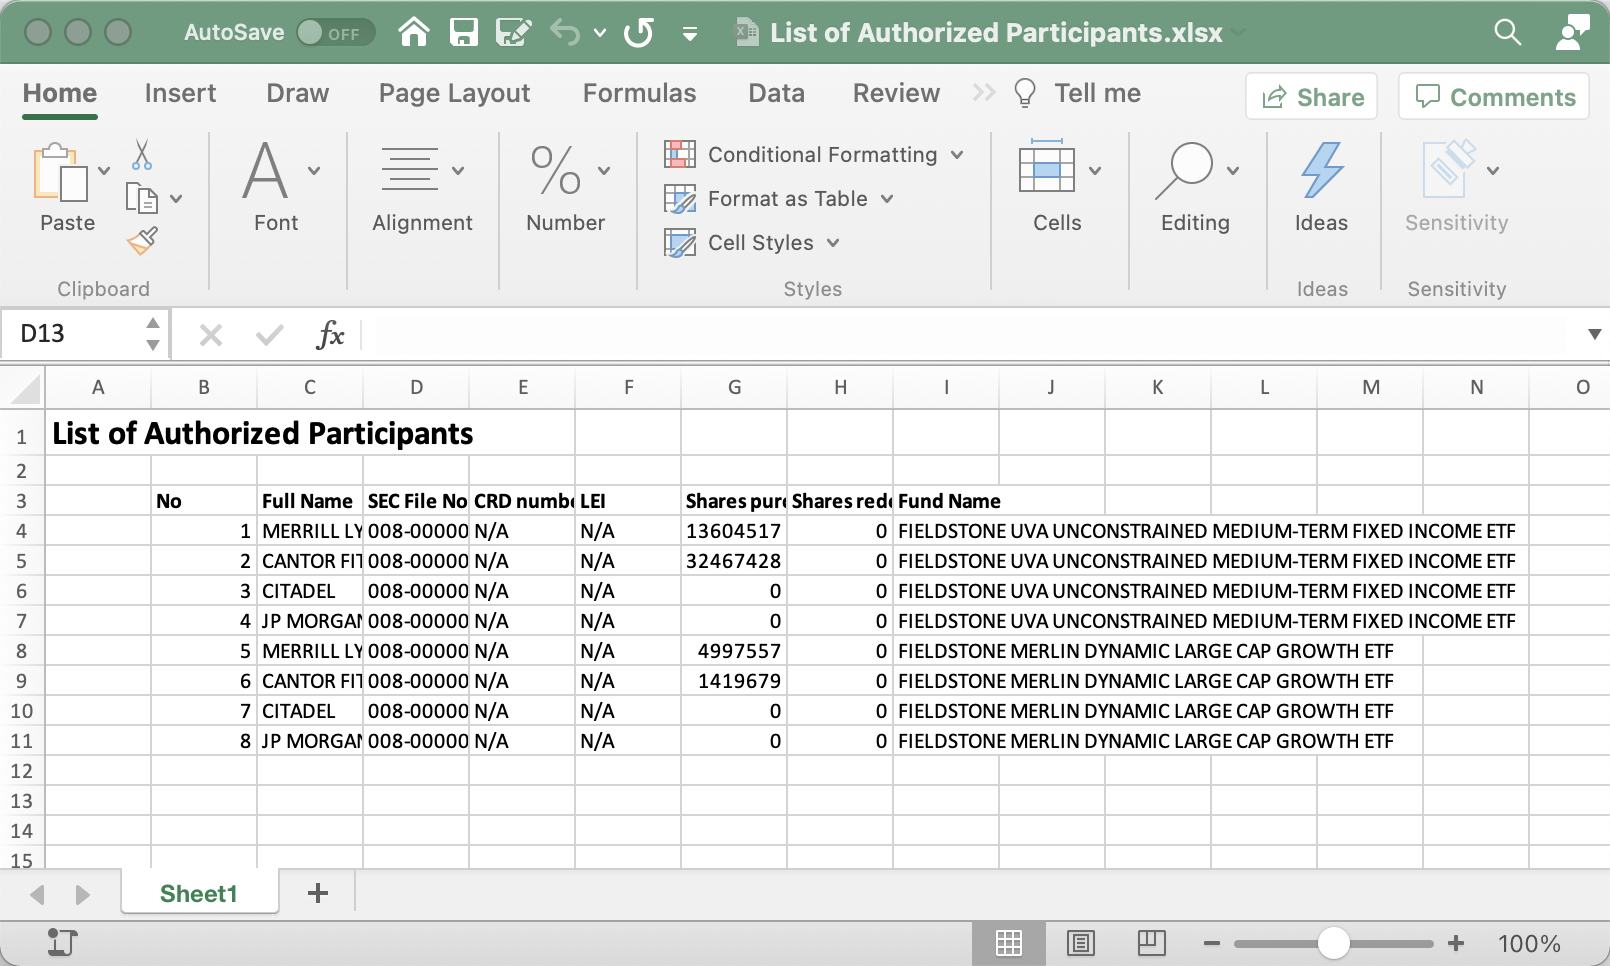

In [27]:
from IPython.display import Image
Image("result.png")

#### Appendix - See the values variables hold

In [28]:
fund_name

['FIELDSTONE UVA UNCONSTRAINED MEDIUM-TERM FIXED INCOME ETF',
 'FIELDSTONE MERLIN DYNAMIC LARGE CAP GROWTH ETF']

In [29]:
dict1

{0: {'authorizedParticipantLei': 'N/A',
  'authorizedParticipantFileNo': '008-00000-0',
  'authorizedParticipantRedeemValue': '0.00',
  'authorizedParticipantName': 'MERRILL LYNCH',
  'authorizedParticipantCrdNo': 'N/A',
  'authorizedParticipantPurchaseValue': '13604517.00',
  'FundName': 'FIELDSTONE UVA UNCONSTRAINED MEDIUM-TERM FIXED INCOME ETF'},
 1: {'authorizedParticipantLei': 'N/A',
  'authorizedParticipantFileNo': '008-00000-0',
  'authorizedParticipantRedeemValue': '0.00',
  'authorizedParticipantName': 'CANTOR FITZGERALD',
  'authorizedParticipantCrdNo': 'N/A',
  'authorizedParticipantPurchaseValue': '32467428.00',
  'FundName': 'FIELDSTONE UVA UNCONSTRAINED MEDIUM-TERM FIXED INCOME ETF'},
 2: {'authorizedParticipantLei': 'N/A',
  'authorizedParticipantFileNo': '008-00000-0',
  'authorizedParticipantRedeemValue': '0.00',
  'authorizedParticipantName': 'CITADEL',
  'authorizedParticipantCrdNo': 'N/A',
  'authorizedParticipantPurchaseValue': '0.00',
  'FundName': 'FIELDSTONE UVA